In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [49]:
from sklearn.datasets import load_breast_cancer, load_boston, load_iris
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve

from sklearn.preprocessing import LabelEncoder    # 전처리에 필요한
from sklearn.preprocessing import OneHotEncoder   # 전처리에 필요한
from sklearn.preprocessing import StandardScaler   # 전처리에 필요한
from sklearn.preprocessing import MinMaxScaler   # 전처리에 필요한

In [3]:
import mglearn

# 1. 선형 회귀 모델

+ hypothesis : y = w[0]x[0] + w[1]x[1] + w[2]x[2] + ... + b           ( w 는 가중치 b는 절편 )
+ 선형회귀 모델
+ 릿지 선형회귀 모델
+ 라쏘 선형회귀 모델
+ 엘라스틱넷 선형회귀 모델 : 릿지 + 라쏘

w[0]: 0.393906  b: -0.031804


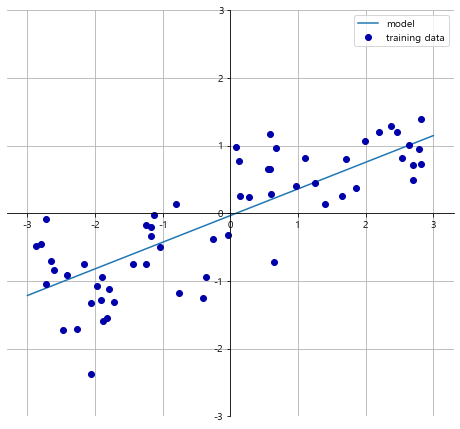

In [4]:
mglearn.plots.plot_linear_regression_wave()

# 선형회귀란 그래프 상 그어진 선을 구하는 것
# 선으로부터 얼마나 떨어져있느냐 = 표준오차
# 선위에 올라와 있다 = 0~1 중 1에 가까운것 = 오차가 적은것

In [7]:
##### 통계적 관점에서 접근

import statsmodels.api as sm

X, y = mglearn.datasets.make_wave(n_samples=60)
model = sm.OLS(y, X).fit()                        #() 안에 종속변수 y, 훈련데이터 X
print(model.summary())

# R-squared (uncentered) -> 단순선형회귀때는 이걸 확인 ( 설명력 )
# Adj. R-squared (uncentered) -> 다중선형회귀때는 이걸 확인

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.674
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              122.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):                    5.42e-16
Time:                        09:52:41   Log-Likelihood:                         -48.070
No. Observations:                  60   AIC:                                      98.14
Df Residuals:                      59   BIC:                                      100.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
##### 머신러닝 관점에서 접근

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)    # 학습

LinearRegression()

In [12]:
print(lr.coef_, lr.intercept_)    # 기울기 = lr.coef_   , 절편 = lr.intercept_

[0.39390555] -0.031804343026759746


In [13]:
print(lr.score(X_test, y_test))    # 설명력 으로 성능을 측정

0.65933685968637


In [15]:
0.39 * 1.2 - 0.031           # 기울기 * 입력값 - 절편

0.43699999999999994

In [16]:
lr.predict([[1.2]])  # 입력값은 2차원 [[]]

# 머신러닝에서는 predict 함수로 계산,  수식을 하나하나 적을필요없이 predict 함수 안에 입력값을 2차원으로 넣어주면 끝

array([0.44088232])

### (1) 실습 : 전기 생산량과 소비량

+ 귀무 가설 : 전기 생산량과 소비량은 관계가 없다.
+ 대립 가설 : 전기 생산량과 소비량은 관계가 있다.

In [26]:
# 월별 전기 사용량(백만 Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]

In [27]:
model = sm.OLS(y, X).fit()                        #() 안에 종속변수 y, 훈련데이터 X
print(model.summary())

#  P>|t|  = 0.000  , 즉 p-value가 0.05보다 작으므로 대립가설 ( 관계가 있다. )채택
# R-squared (uncentered):  0.994   , 즉 설명력도 0.994 로 상당히 높다

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1907.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):                    1.11e-13
Time:                        10:46:25   Log-Likelihood:                          1.3021
No. Observations:                  12   AIC:                                    -0.6043
Df Residuals:                      11   BIC:                                    -0.1194
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\alcls\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
##### 생산량이 5일때 사용량이 얼마일까 ?

X_arr = np.array(X)
X_arr = X_arr.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_arr, y)    # 2차원 배열로 만들어줘야하므로...

lr.predict([[5.0]])

array([3.39759761])

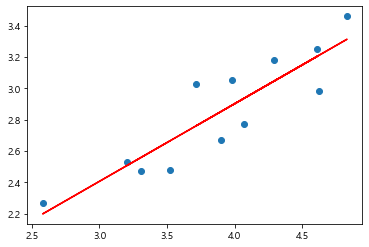

In [31]:
plt.scatter(X, y)
plt.plot(X, lr.coef_ * X + lr.intercept_, c="red")

### (2) 실습 : 와인 재료로 와인의 품질을 맞춰라

In [35]:
data = pd.read_csv("data/wine.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
X = data[data.columns[0:11]]    # 종속변수
y = data[["quality"]]        # 독립변수

X.head()
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [42]:
X_add = sm.add_constant(X)   # 절편을 추가, 반영 ( 절편을 추가해주지 않으면 y = wx 형태로 무조건 0을 지나게끔 선을 그으므로 값이 틀려진다.)
                            # 절편을 추가해주므로써 공식이 y = wx + b 가 되게끔 조정

multi_model = sm.OLS(y, X_add).fit()
print(multi_model.summary())

# 와인의 품질에 영향을 줄만한 변수는 ( p-value가 0.05보다 작은 수치) 총 5가지 = volatile_acidity / chlorides / total_sulfur_dioxide / sulphates / alcohol
# 설명력 (R-squared) 도 0.361로 낮다.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.79e-145
Time:                        11:02:54   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

In [47]:
##### 머신러닝 관점에서 접근

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)    # 학습

LinearRegression()

In [48]:
lr.score(X_train, y_train)  # 학습한 결과

0.3611982441321646

In [49]:
lr.score(X_test, y_test)   # 시험한 결과                 # 학습한 결과와 시험한 결과의 차이 = 과적합,  과적합을 줄이는 노력이 필요

0.35138853325173836

### (3) 고차원 특성에 대한 과적합

In [51]:
import warnings
warnings.filterwarnings("ignore")

boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [52]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [53]:
lr = LinearRegression().fit(X_train, y_train)    # 학습

In [54]:
print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202114


In [56]:
from mglearn.datasets import load_extended_boston

X, y = load_extended_boston()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

# 변수의 개수를 104개로 늘렸더니 과적합 (훈련결과와 테스트결과의 차이) 이 더 벌어졌다.
# 고차원일수록 과적합이 보일 수 밖에 없다.

# 일반선형회귀모델은 하이퍼 파라미터가 없으므로 과적합을 조절할 방법이 없다.
# 이로인해 일반선형회귀모델이 가진 자체적인 해결능력이 없는 부분을 보완한 방법이 릿지, 라쏘, 엘라스틱넷 선형회귀모델이다.
# 릿지, 라쏘, 엘라스틱넷 선형회귀모델은 과적합을 줄이기위한 노력을 할 수 있다.

(506, 104)
훈련 점수 :  0.9520519609032729
테스트 점수 :  0.6074721959665943


### (4) 릿지(Ridge) 선형 회귀모델

+ L2 규제(Regularization)
+ MSE항에 Penelty항을 추가
+ 알파를 크게 하면 페널티의 효과가 커지고 (모델이 단순, 가중치 감소) , 작게하면 그 반대가 된다.
+ 모델을 단순하게 해주고 훈련셋에 대한 성능 차이를 절충하는 효과

In [ ]:
# MSE 는 평균제곱오차  Mean Squared Error

In [57]:
from sklearn.linear_model import Ridge

In [64]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)     # 여기서 alpha=1.0 은 기본값 = 없어도 결과는 같음

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

# 일반선형회귀모델보다 과적합이 줄었다.  (훈련점수와 테스트점수와의 차이가 줄어들음)

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744751


In [65]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)   # alpha 알파값을 크게 설정하면 규제가 강해지고

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744751


In [66]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)   # alpha 알파값을 작게 설정하면 규제가 완화된다

print("훈련 점수 : ", ridge.score(X_train, y_train))
print("테스트 점수 : ", ridge.score(X_test, y_test))

훈련 점수 :  0.885796658517094
테스트 점수 :  0.7527683481744751


(-25.0, 25.0)

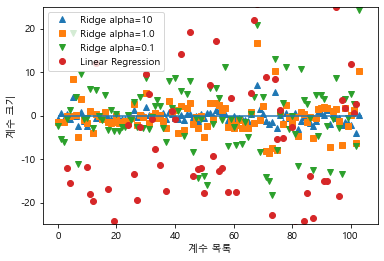

In [68]:
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge.coef_, "s", label="Ridge alpha=1.0")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")
plt.plot(lr.coef_, "o", label="Linear Regression")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)


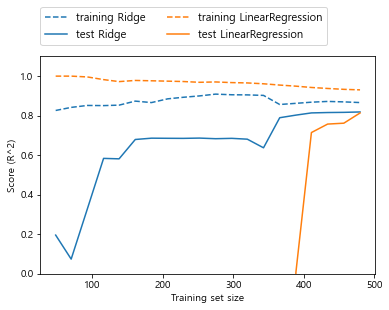

In [69]:
##### 알파값을 1로 고정한 상태에서 데이터의 크기
mglearn.plots.plot_ridge_n_samples()

# 훈련이든 테스트 데이터든 데이터의 양이 많아져야 과적합 (훈련과 테스트의 차이) 이 줄어든다.

In [73]:
print(np.sum(ridge.coef_ != 0))
print(np.sum(ridge01.coef_ != 0))
print(np.sum(ridge10.coef_ != 0))

# ridge는 규제에 따라 변수(특성)의 수는 바뀌지 않는다.  오직 과적합 차이만 변화

104
104
104


### (5) 라쏘(Lasso) 회귀 선형모델

+ L1 규제 사용
+ 알파를 크게하면 페널티의 효과가 커지고 작게하면 그 반대가 된다.
+ 특성 선택이 자동적으로 이루어진다.


- Lasso 는 ridge에 비해 변수(특성)의 수를 변화시키기 때문에 Lasso를 쓰기전 ridge로 먼저 과적합 차이를 줄여보고 안될 시 Lasso를 사용
- 하는 방법으로 가는게 옳다.

In [70]:
from sklearn.linear_model import Lasso

In [74]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

print("훈련 점수 : ", lasso001.score(X_train, y_train))
print("테스트 점수 : ", lasso001.score(X_test, y_test))
print("특성의 수 : ", np.sum(lasso001.coef_ != 0))

훈련 점수 :  0.8961122320864716
테스트 점수 :  0.7677995670886713
특성의 수 :  32


In [76]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

print("훈련 점수 : ", lasso00001.score(X_train, y_train))
print("테스트 점수 : ", lasso00001.score(X_test, y_test))
print("특성의 수 : ", np.sum(lasso00001.coef_ != 0)) 

# 규제 (alpha) 를 약하게 하냐 강하게 하냐에 따라 과적합 차이와 변수(특성)의 차이발생

훈련 점수 :  0.9420931515237063
테스트 점수 :  0.6976541391663631
특성의 수 :  100


(-25.0, 25.0)

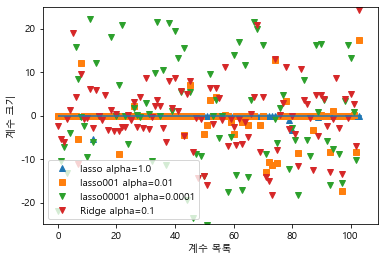

In [78]:
plt.plot(lasso.coef_, "^", label="lasso alpha=1.0")
plt.plot(lasso001.coef_, "s", label="lasso001 alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="lasso00001 alpha=0.0001")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

### (6) 실습 : 키에 따라 몸무게가 얼마인지 예측

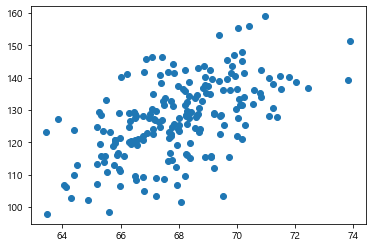

In [89]:
df = pd.read_csv("data/heights.csv")
df

X = df["height"]
y = df["weight"]

plt.plot(X, y, "o")

In [94]:
# 키가 70인 사람의 몸무게는 ?

lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)    # 학습

lr.predict([[70]])

array([[134.2596226]])

In [95]:
lr.score(X.values.reshape(-1, 1), y)               # 설명력이 낮다.

0.31009833265482667

### (7) 실습 : Boston Housing Sample

In [ ]:
"""
속성	내용
-----------------
CRIM	범죄율
ZN	25,000평방피트당 주거지역의 비율
INDUS	비소매 상업지구 비율(단위: 에이커)
CHAS	찰스강에 인접해 있으면 1, 그렇지 않으면 0
NOX	일산화질소 농도(단위:0.1ppm)
RM	주택당 방의 수
AGE	1940년 이전에 건설된 주택의 비율
DIS	5개의 보스턴 직업고용센터와의 거리(가중 평균)
RAD	고속도로 접근성
TAX	재산세율
PTRATIO	학생/교사비율
B	흑인비율
LSTAT	하위계층비율
MEDV	타운의 주택 가격 중앙값(단위: 1,000달러
"""


In [98]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)   # boston.data 는 독립변수만 모아져있다.
df

df["MEDV"] = boston.target      # 종속변수 (집값 = MEDV) 추가
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


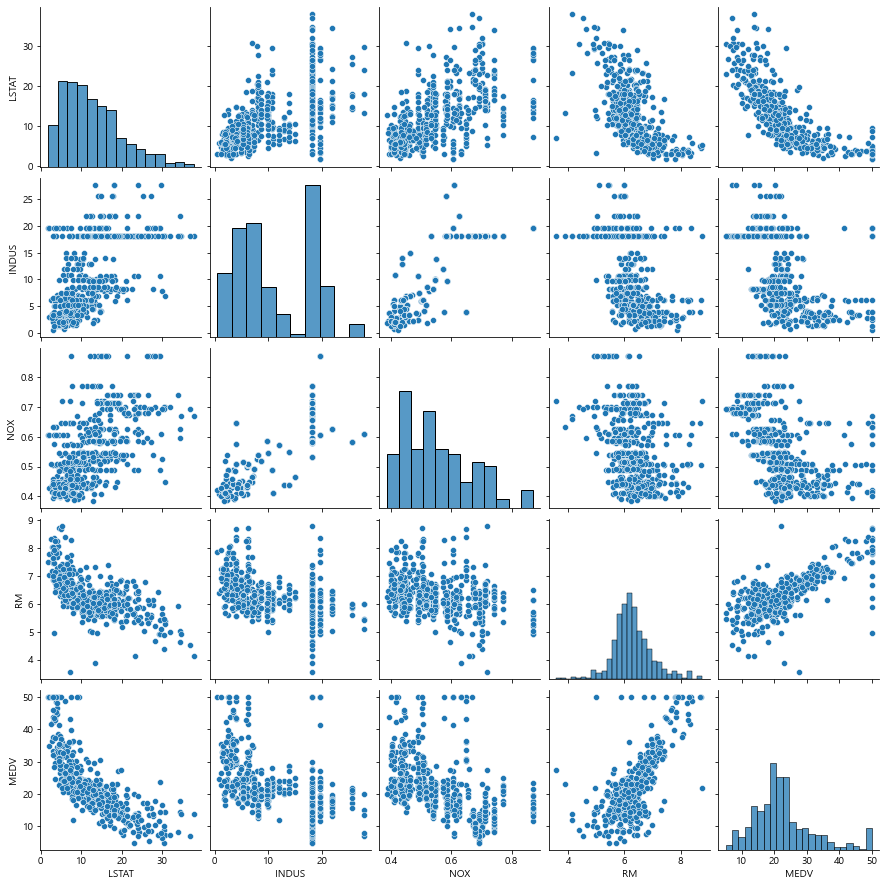

In [99]:
sns.pairplot(df[["LSTAT", "INDUS", "NOX", "RM", "MEDV"]], size=2.5)

#그래프를 그려서 시각적으로 집값(독립변수 = MEDV)과 관련있는 요소를 4가지중 무엇인지 확인해보자
# 시각적으로는 양의 상관관계인 RM (방의 수)

<AxesSubplot:>

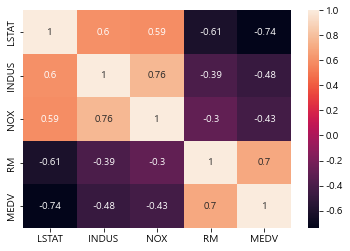

In [105]:
# 히트맵으로도 확인해보기
cols = ["LSTAT", "INDUS", "NOX", "RM", "MEDV"]   # 변수를 모아서

heat = np.corrcoef(df[cols].values.T)    # 상관계수를 구하고
sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("훈련 점수 : ", lr.score(X_train, y_train))
print("테스트 점수 : ", lr.score(X_test, y_test))

훈련 점수 :  0.7697699488741149
테스트 점수 :  0.6354638433202114


In [108]:
##### 방이 4개일때 집 값은 얼마인가 ?

X = df[["RM"]].values
y = df[["MEDV"]].values

lr = LinearRegression().fit(X, y)

house_price = lr.predict([[4]])
print("방이 {}개인 주택 가격은 {} 달러이다.".format(4, house_price*1000))

방이 4개인 주택 가격은 [[1737.81514828]] 달러이다.


### (8) 실습 : Manhattan Housing Sample

In [112]:
df = pd.read_csv("data/manhattan.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [ ]:
"""
rental_id	rental ID
rent	임대료 ($)
bedrooms	침실수
bathrooms	화장실수
size_sqft	평수(feet)
min_to_subway	지하철과의 거리 (minutes)
floor	층수
building_age_yrs	건물 연령
no_fee	중계수수료 (0 for fee, 1 for no fee)
has_roofdeck	옥상 (o for no, 1 for yes)
has_washer_dryer	세탁기/건조기 (0/1)
has_doorman	도어맨 (0/1)
has_elevator	엘리베이터 (0/1)
has_dishwasher	식기세척기 (0/1)
has_patio	안마당(patio) (0/1)
has_gym	헬스장(gym) (0/1)
neighborhood	이웃 (ex: 한인타운)
submarket	submarket (ex: North Brooklyn)
borough	borough (ex: Brooklyn)
"""


In [ ]:
# 변수들의 관계를 시각화
# 통계적 검증을 통해 설명력이 70% 이싱이리면 작업을 계속 진행
# 훈련 결과와 테스트결과를 비교하여 설명계수와 과적합 확인
# 필요하면 릿지, 라쏘를 활용
# 임대료 계산 (1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0 -> 2309)

In [ ]:
"bedrooms", "bathrooms", "size_sqft", "min_to_subway", "floor",
        "building_age_yrs", "no_fee", "has_roofdeck", "has_washer_dryer", "has_doorman",
        "has_elevator", "has_dishwasher", "has_patio", "has_gym"


---

# 2. Logistic Regression

+ L2 규제 사용
+ C 파라미터를 사용해서 규제의 강도를 결정 ( C값이 커지면 규제가 약해지고 과적합의 원인이 되고 작아지면 규제가 강해지는 )

In [ ]:
# Logistic Regression 의 목적은 이진분류로써 둘 중 하나를 제대로 고르는 것
# 직선을 곡선화 시키는 것 ( 아무리 작아도 0 밑으로 안떨어지고 아무리 커도 1 위로 넘어가지 않는...)

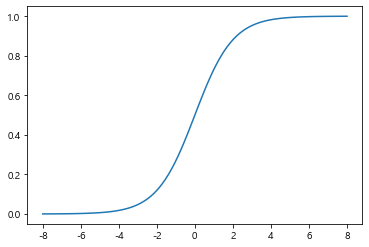

In [7]:
##### Sigmoid 그래프 그리기

X = np.linspace(-8, 8, 100)

plt.plot(X, 1 / (1 + np.exp(-X)))

In [18]:
X, y = mglearn.datasets.make_forge()

clf1 = LinearSVC(C=100).fit(X, y)
clf2 = LogisticRegression(C=100).fit(X, y)

C:\Users\alcls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\alcls\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


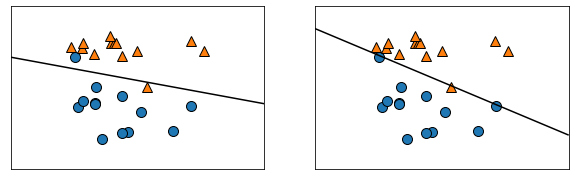

In [19]:
_, axes = plt.subplots(1, 2, figsize=(10, 3))

#LinearSVC
mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=axes[0])
mglearn.plots.plot_2d_separator(clf1, X, ax=axes[0])

#LogisticRegression
mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=axes[1])
mglearn.plots.plot_2d_separator(clf2, X, ax=axes[1])

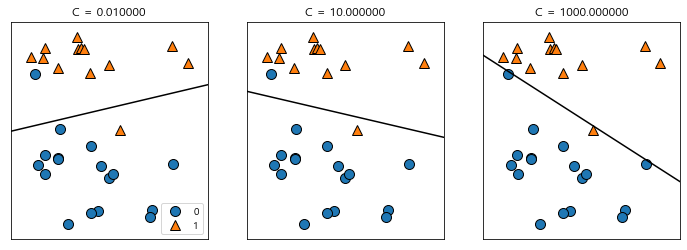

In [17]:
mglearn.plots.plot_linear_svc_regularization()

### (1) C값에 따른 성능 결과

In [26]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [28]:
logreg = LogisticRegression(C=1, penalty="l2", max_iter=10000)
logreg.fit(X_train, y_train)
print("훈련 점수 : ", logreg.score(X_train, y_train))
print("테스트 점수 : ", logreg.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.951048951048951


In [29]:
logreg1000 = LogisticRegression(C=1000, penalty="l2", max_iter=10000)
logreg1000.fit(X_train, y_train)
print("훈련 점수 : ", logreg1000.score(X_train, y_train))
print("테스트 점수 : ", logreg1000.score(X_test, y_test))

# C 값이 커졌으나 과적합이 생김 ( 훈련점수와 테스트 점수 사이의 차이 )

훈련 점수 :  0.9929577464788732
테스트 점수 :  0.951048951048951


In [30]:
logreg001 = LogisticRegression(C=0.01, penalty="l2", max_iter=10000)
logreg001.fit(X_train, y_train)
print("훈련 점수 : ", logreg001.score(X_train, y_train))
print("테스트 점수 : ", logreg001.score(X_test, y_test))

훈련 점수 :  0.9530516431924883
테스트 점수 :  0.9440559440559441


(-5.0, 5.0)

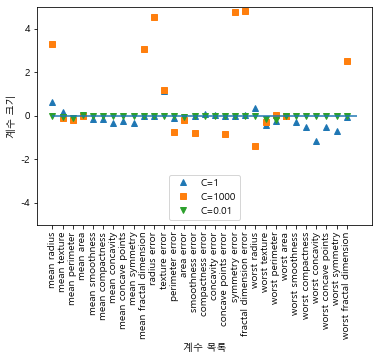

In [35]:
plt.plot(logreg.coef_.T, "^", label="C=1")
plt.plot(logreg1000.coef_.T, "s", label="C=1000")
plt.plot(logreg001.coef_.T, "v", label="C=0.01")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

+ L1 규제로 변경

In [38]:
logreg_l1 = LogisticRegression(C=1, penalty="l1", max_iter=10000, solver="liblinear")
logreg_l1.fit(X_train, y_train)
print("훈련 점수 : ", logreg_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg_l1.score(X_test, y_test))

훈련 점수 :  0.9624413145539906
테스트 점수 :  0.958041958041958


In [40]:
logreg1000_l1 = LogisticRegression(C=1000, penalty="l1", max_iter=10000, solver="liblinear")
logreg1000_l1.fit(X_train, y_train)
print("훈련 점수 : ", logreg1000_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg1000_l1.score(X_test, y_test))

훈련 점수 :  0.9929577464788732
테스트 점수 :  0.9440559440559441


In [41]:
logreg001_l1 = LogisticRegression(C=0.01, penalty="l1", max_iter=10000, solver="liblinear")
logreg001_l1.fit(X_train, y_train)
print("훈련 점수 : ", logreg001_l1.score(X_train, y_train))
print("테스트 점수 : ", logreg001_l1.score(X_test, y_test))

훈련 점수 :  0.9178403755868545
테스트 점수 :  0.9370629370629371


(-5.0, 5.0)

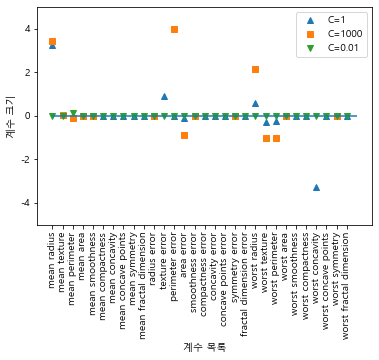

In [42]:
plt.plot(logreg_l1.coef_.T, "^", label="C=1")
plt.plot(logreg1000_l1.coef_.T, "s", label="C=1000")
plt.plot(logreg001_l1.coef_.T, "v", label="C=0.01")

plt.legend()
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

# l2 보다 데이터가 좀 더 차분해진, 단순해진 느낌 = 변수들이 많이 삭제됨

### (2) KNN, LogisticRegression, LinearSVC 성능 비교

In [48]:
##### Logistic Regression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

0.951048951048951


In [53]:
##### LinearSVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = LinearSVC(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

0.916083916083916


C:\Users\alcls\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
##### KNN

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

0.9370629370629371


([<matplotlib.axis.XTick at 0x1f3d5b7faf0>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

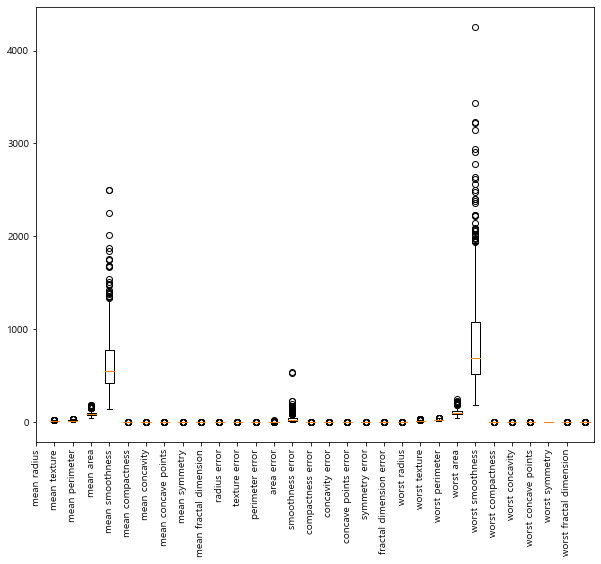

In [58]:
##### 이상치 확인

plt.figure(figsize=(10, 8))
plt.boxplot(cancer.data)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

In [61]:
##### 표준화  ( 데이터에서 평균을 뺀 값을 표준편차로 나누기 )

m1 = cancer.data.mean(axis=0)
sd1 = cancer.data.std(axis=0)   # 표준편차
data1 = (cancer.data - m1) / sd1
print(data1)

print("------------------------------------------------------------")

ss = StandardScaler()
ss.fit(cancer.data)
data2 = ss.transform(cancer.data)
print(data2)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
------------------------------------------------------------
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ...

([<matplotlib.axis.XTick at 0x1f3d863f1c0>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'w

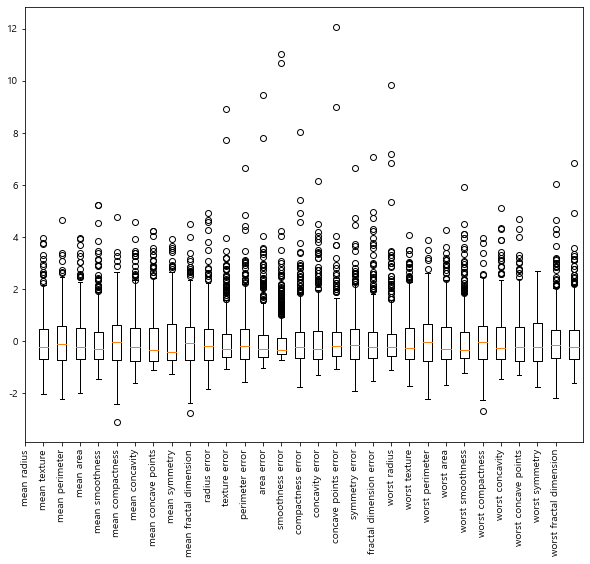

In [62]:
##### 이상치 조정

plt.figure(figsize=(10, 8))
plt.boxplot(data2)
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

# 위에서는 이상치 수치를 보면 1000단위였는데 표준화 이후 이상치는 최대 12로 범위가 변경되었음 ( = 이상치 조정 )

In [63]:
##### 표준화 후 Logistic Regression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data2, cancer.target, random_state=0)

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

# 표준화 하기 전 값 : 0.951048951048951
# 표준화 한 후 값 : 0.965034965034965
# 표준화 한 이후 값이 좋아짐 = 1.5점 증가 (전처리의 효과를 강하게 봄)

0.965034965034965


In [64]:
##### 표준화 후 LinearSVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data2, cancer.target, random_state=0)

model = LinearSVC(max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

# 표준화 하기 전 값 : 0.916083916083916
# 표준화 한 후 값 : 0.9440559440559441
# 표준화 한 이후 값이 좋아짐 = 2.8점 증가 (전처리의 효과를 강하게 봄)

0.9440559440559441


In [65]:
##### 표준화 후 KNN

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data2, cancer.target, random_state=0)

model = KNeighborsClassifier().fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

# 표준화 하기 전 값 : 0.9370629370629371
# 표준화 한 후 값 : 0.951048951048951
# 표준화 한 이후 값이 좋아짐 = 1.8점 증가 (전처리의 효과를 강하게 봄)

0.951048951048951


In [66]:
##### C 값 조정
##### 표준화 후 Logistic Regression

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data2, cancer.target, random_state=0)

model = LogisticRegression(C=0.1,max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

# C 값 조정하기 전 값 : 0.965034965034965
# C 값 조정하기 후 값 : 0.965034965034965
# C 값 (하이퍼파라미터) 조정 후 변화가 없음

0.965034965034965


In [70]:
##### C 값 조정
##### 표준화 후 LinearSVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data2, cancer.target, random_state=0)

model = LinearSVC(C=0.01, max_iter=10000).fit(X_train, y_train)
scores = model.score(X_test, y_test)
print(scores)

# C 값 조정하기 전 값 : 0.9440559440559441
# C 값 조정하기 후 값 : 0.972027972027972
# C 값 (하이퍼파라미터) 조정 후 변화가 있음

0.972027972027972


### (3) 다중 분류 클래스

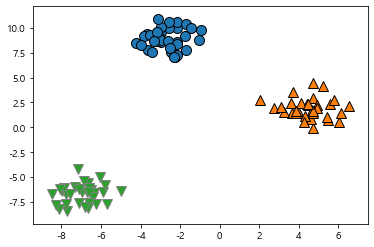

In [73]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [76]:
model = LinearSVC().fit(X, y)

print(model.coef_)

[[-0.17492544  0.23141098]
 [ 0.4762122  -0.06937523]
 [-0.18914142 -0.2040061 ]]


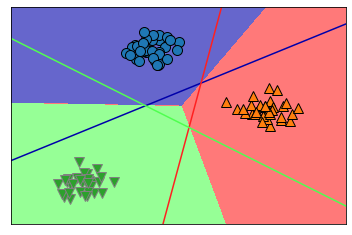

In [79]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)  # 다시 산포도 그리고
xline = np.linspace(-15, 15)   # x축 y축 조절하고

for coef, intercept, color in zip(model.coef_, model.intercept_, mglearn.cm3.colors):
    plt.plot(xline, -(xline*coef[0] + intercept)/coef[1], c=color)
    
mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=0.6)


### (4) 평가

+ 정확도 (Accuracy)
+ 정밀도
+ 재현율
+ 오차행렬 (Confusion Matrix)
+ F1 score
+ ROC, AUC

#### 1) 정확도 (Accuracy)

+ 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
+ (TP + TN) / (TN + FP + FN + TP)    ,   맞춘 데이터 / 전체 데이터 = 정확도

In [82]:
from sklearn.datasets import load_digits

digits = load_digits()    # 데이터 로딩
print(digits.data.shape)  # 데이터의 크기를 확인  ( 데이터 갯수 : 1797, 변수 64개 )
print(digits.data)  # 여기서 로딩한 데이터는 이미지데이터이며 한줄이 숫자(변수) 64개로 이루어지고 이게 1797개 있는 구조임
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


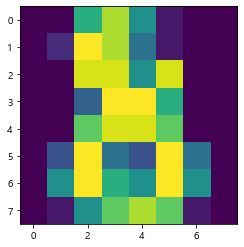

In [85]:
plt.imshow(digits.data[-1].reshape(8, 8))      # imshow() 는 숫자를 이미지로 변환

In [88]:
y = (digits.target == 7).astype(int)   # 7과 7이 아닌 값들을 y에 담기

np.unique(y)   # 7이 아닌 수들은 0으로,  7인 수는 1로 표기... (이진분류 개념)
np.bincount(y)   # 7이 아닌 수들 : 1618개,   7인 수 : 179개

array([1618,  179], dtype=int64)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=42)

In [92]:
from sklearn.base import BaseEstimator

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [93]:
clf = MyFakeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test, pred))

#분류알고리즘에서는 절대로 정확도만으로 결과를 측정하면 안된다. 또 정확도만으로는 결과를 신뢰할 수 없다.

정확도 :  0.9088888888888889


#### 2) Confusion Matrix

+ 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 오류가 발생하고 있는지를 함께 나타내는 지표
+ TP, TN, FP, FN

In [95]:
confusion_matrix(y_test, pred)

# TrueNegative(TN) : 409 / FalsePositive(FP) : 0 / FalseNegative(FN) : 41 / TruePositive(TP) : 0
# 양성이라고 맞춘 것 (TP) 가 0이므로 성능이 아주 형편없는 것으로 말할 수 있다.

array([[409,   0],
       [ 41,   0]], dtype=int64)

#### 3) 정밀도(Precision)와 재현율(Recall)

+ Positive 의 예측 성능에 좀 더 초점을 맞춘 평가 지표
+ 정밀도 : TP / (FP + TP) : 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
+ 재현율 : TP / (FN + TP) : 실제값을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율
+ 재현율은 민감도(Sensitive) 또는 TPR(True Positive Rate)라고도 한다.

---

+ 재현율은 실제 양성데이터를 음성으로 잘못 판단하게되면 업무상 큰 영향이 발생하는 경우에 중요한 지표
    - 암 환자 판정, 보험 사기 판정

+ 정밀도는 실제 음성데이터를 양성으로 잘못 판단하게되면 업무상 큰 영향이 발생하는 경우에 중요한 지표
    - 스팸 메일 판정

In [ ]:
# 정밀도와 재현율은 Trade Off 관계 -> 한쪽을 높이면 한쪽은 낮아지고 한쪽을 낮추면 다른 한쪽이 높아지는 관계...
# 가장 바람직한 관계는 정밀도와 재현율이 비슷한 값 ( 너무 낮아도 문제, 높아도 문제이므로 가장 높았을때 비슷 )

#### 4) F1 score

+ 정밀도와 재현율의 조화평균
+  ( (precision * recall) / (precision + recall) ) * 2

#### 5) 실습 : 타이타닉 생존자 분류하기

In [31]:
df = pd.read_csv("data/train.csv")
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
##### 결측치 제거
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Cabin"].fillna("N", inplace=True)
df["Embarked"].fillna("N", inplace=True)

In [34]:
df.info()     # 결측치가 사라지고 전부 다 채워져 891개 동일.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
##### 불필요한 변수 제거
df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [37]:
##### 문자들을 숫자화 : 레이블 인코딩
df["Cabin"] = df["Cabin"].str[:1]

In [38]:
features = ["Cabin", "Sex", "Embarked"]
for feature in features:
    le = LabelEncoder()
    le.fit(df[feature])
    df[feature] = le.transform(df[feature])

In [39]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [41]:
np.bincount(y)

array([549, 342], dtype=int64)

In [42]:
lr = LogisticRegression(max_iter=1200000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

In [43]:
pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("정확도 : ", accuracy)

정확도 :  0.8212290502793296


In [44]:
confusion = confusion_matrix(y_test, pred)
print("오차 행렬 : \n", confusion)

오차 행렬 : 
 [[91 14]
 [18 56]]


In [45]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, pred)
print("정밀도 : ", precision)

recall = recall_score(y_test, pred)
print("재현율 : ", recall)

정밀도 :  0.8
재현율 :  0.7567567567567568


In [48]:
print(classification_report(y_test, pred))     # clssification_report(정답, 예측값)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [52]:
fpr, tpr, thresholds = roc_curve(y, lr.decision_function(X))

Text(0, 0.5, 'True Positive Rate(recall)')

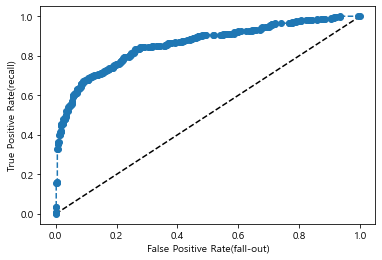

In [55]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, "o--")     # 가운데 직선(중앙선) 에서 멀어질 수록 성능이 좋다는 것(왼쪽 모서리에 가까울수록 좋은성능을 나타내는것)
# x축 : 얼마나 틀렸는가 ,  y축 : 얼마나 맞췄는가

plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")

#### 6) ROC

In [56]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=0)

In [57]:
model = LogisticRegression().fit(X, y)

In [58]:
y_hat = model.predict(X)

In [59]:
print(y_hat[:40])
print(y[:40])

[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


In [60]:
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 28, 475]], dtype=int64)

In [61]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       497
           1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(0, 0.5, 'True Positive Rate(recall)')

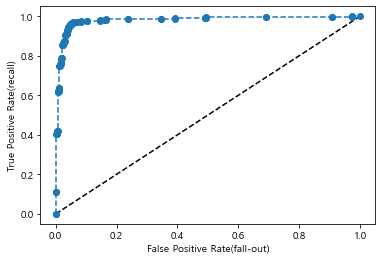

In [62]:
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, "o--")
plt.xlabel("False Positive Rate(fall-out)")
plt.ylabel("True Positive Rate(recall)")

#### 7) 다중 분류에서의 Confusion Matrix

In [63]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

<AxesSubplot:>

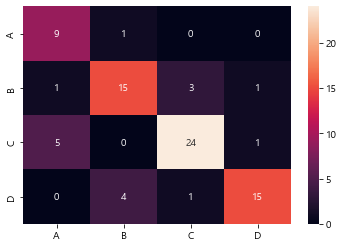

In [68]:
data = [[9, 1, 0, 0],
       [1, 15, 3, 1],
       [5, 0, 24, 1],
       [0, 4, 1, 15]]

df = pd.DataFrame(data, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df

sns.heatmap(df, annot=True)

<AxesSubplot:>

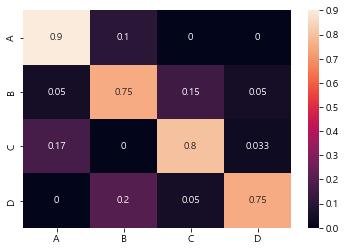

In [69]:
##### 정규화(Normalization)

total = np.sum(data, axis=1)
data = data / total[:, None]
data

df = pd.DataFrame(data, index=[i for i in "ABCD"], columns=[i for i in "ABCD"])
df

sns.heatmap(df, annot=True)